In [1]:
#import modules for analyzing ,plotting, and formatting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import sqlite3

In [2]:
wildfire = pd.read_csv('wildfire_ca.csv')
weather = pd.read_csv('weather_ca.csv')

<ipython-input-2-6d6cd806b996>:1: DtypeWarning: Columns (13,14,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire = pd.read_csv('wildfire_ca.csv')


In [137]:
wildfire.head()

,Unnamed: 0.1,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [4]:
wildfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189550 entries, 0 to 189549
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0.1                189550 non-null  int64  
 1   Unnamed: 0                  189550 non-null  int64  
 2   OBJECTID                    189550 non-null  int64  
 3   FOD_ID                      189550 non-null  int64  
 4   FPA_ID                      189550 non-null  object 
 5   SOURCE_SYSTEM_TYPE          189550 non-null  object 
 6   SOURCE_SYSTEM               189550 non-null  object 
 7   NWCG_REPORTING_AGENCY       189550 non-null  object 
 8   NWCG_REPORTING_UNIT_ID      189550 non-null  object 
 9   NWCG_REPORTING_UNIT_NAME    189550 non-null  object 
 10  SOURCE_REPORTING_UNIT       189550 non-null  object 
 11  SOURCE_REPORTING_UNIT_NAME  189550 non-null  object 
 12  LOCAL_FIRE_REPORT_ID        61933 non-null   float64
 13  LOCAL_INCIDENT

In [5]:
wildfires = wildfire.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'OBJECTID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', \
                          'NWCG_REPORTING_UNIT_ID', 'SOURCE_REPORTING_UNIT', 'NWCG_REPORTING_UNIT_NAME', 'FIRE_CODE', 'FIRE_NAME', \
                          'ICS_209_INCIDENT_NUMBER','ICS_209_NAME', 'MTBS_ID', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', \
                          'LOCAL_INCIDENT_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'DISCOVERY_DATE', 'CONT_DATE', 'FIPS_NAME', 'Shape',\
                          'OWNER_CODE', 'FOD_ID', 'FIPS_CODE', 'STATE'])

wildfires.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,COUNTY
0,2005,33,1300.0,9.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,63.0
1,2004,133,845.0,1.0,Lightning,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,61.0
2,2004,152,1921.0,5.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,17.0
3,2004,180,1600.0,1.0,Lightning,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,3.0
4,2004,180,1600.0,1.0,Lightning,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,3.0


In [136]:
print(wildfires.STAT_CAUSE_DESCR.value_counts())
print(wildfires.FIRE_SIZE_CLASS.value_counts())

Miscellaneous        10681
Lightning             9071
Equipment Use         6310
Missing/Undefined     4419
Arson                 3832
Campfire              2767
Debris Burning        2327
Children              1180
Smoking               1049
Powerline              553
Railroad               119
Fireworks               31
Structure               31
Name: STAT_CAUSE_DESCR, dtype: int64
A    26293
B    13169
C     1771
D      465
E      269
F      225
G      178
Name: FIRE_SIZE_CLASS, dtype: int64


In [6]:
wildfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189550 entries, 0 to 189549
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FIRE_YEAR         189550 non-null  int64  
 1   DISCOVERY_DOY     189550 non-null  int64  
 2   DISCOVERY_TIME    110217 non-null  float64
 3   STAT_CAUSE_CODE   189550 non-null  float64
 4   STAT_CAUSE_DESCR  189550 non-null  object 
 5   CONT_DOY          91908 non-null   float64
 6   CONT_TIME         91198 non-null   float64
 7   FIRE_SIZE         189550 non-null  float64
 8   FIRE_SIZE_CLASS   189550 non-null  object 
 9   LATITUDE          189550 non-null  float64
 10  LONGITUDE         189550 non-null  float64
 11  OWNER_DESCR       189550 non-null  object 
 12  COUNTY            56221 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 18.8+ MB


In [7]:
wildfires.isnull().sum()

FIRE_YEAR                0
DISCOVERY_DOY            0
DISCOVERY_TIME       79333
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DOY             97642
CONT_TIME            98352
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_DESCR              0
COUNTY              133329
dtype: int64

In [8]:
wildfires = wildfires.dropna()
wildfires.isnull().sum()

FIRE_YEAR           0
DISCOVERY_DOY       0
DISCOVERY_TIME      0
STAT_CAUSE_CODE     0
STAT_CAUSE_DESCR    0
CONT_DOY            0
CONT_TIME           0
FIRE_SIZE           0
FIRE_SIZE_CLASS     0
LATITUDE            0
LONGITUDE           0
OWNER_DESCR         0
COUNTY              0
dtype: int64

In [9]:
weather.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,102527,W-103895,Fog,Moderate,2016-01-02 00:53:00,2016-01-02 01:53:00,0.00,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0
1,102528,W-103896,Rain,Light,2016-01-04 02:53:00,2016-01-04 05:53:00,0.02,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0
2,102529,W-103897,Rain,Light,2016-01-04 11:53:00,2016-01-04 17:53:00,0.22,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0
3,102530,W-103898,Rain,Light,2016-01-05 06:53:00,2016-01-05 12:48:00,0.23,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0
4,102531,W-103899,Rain,Moderate,2016-01-05 12:48:00,2016-01-05 13:50:00,1.11,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0


In [10]:
weather = weather.drop(columns=['Unnamed: 0'])
weather.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-103895,Fog,Moderate,2016-01-02 00:53:00,2016-01-02 01:53:00,0.00,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0
1,W-103896,Rain,Light,2016-01-04 02:53:00,2016-01-04 05:53:00,0.02,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0
2,W-103897,Rain,Light,2016-01-04 11:53:00,2016-01-04 17:53:00,0.22,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0
3,W-103898,Rain,Light,2016-01-05 06:53:00,2016-01-05 12:48:00,0.23,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0
4,W-103899,Rain,Moderate,2016-01-05 12:48:00,2016-01-05 13:50:00,1.11,US/Pacific,KWVI,36.9394,-121.79,Freedom,Santa Cruz,CA,95019.0


In [134]:
print(weather.Severity.value_counts())
print(weather.Type.value_counts())

Light       118624
Moderate     96243
Severe       89159
Heavy         3456
UNK           1912
Other           31
Name: Severity, dtype: int64
Fog              148727
Rain             130986
Cold              12930
Snow              12552
Storm              2287
Precipitation      1912
Hail                 31
Name: Type, dtype: int64


In [11]:
weather.isnull().sum()

EventId                 0
Type                    0
Severity                0
StartTime(UTC)          0
EndTime(UTC)            0
Precipitation(in)       0
TimeZone                0
AirportCode             0
LocationLat             0
LocationLng             0
City                 3286
County                  0
State                   0
ZipCode              3286
dtype: int64

In [65]:
print(weather.LocationLng.max())
print(weather.LocationLng.min())
print(weather.LocationLat.max())
print(weather.LocationLat.min())

print(wildfires.LONGITUDE.max())
print(wildfires.LONGITUDE.min())
print(wildfires.LATITUDE.max())
print(wildfires.LATITUDE.min())

-114.6189
-124.238
41.7837
32.563
-114.1402
-124.3993
42.0078
32.5527


In [103]:
print(wildfires.FIRE_SIZE.min())
print(wildfires.FIRE_SIZE.max())

0.01
315578.8


In [106]:
print(weather['Precipitation(in)'].max())
print(weather['Precipitation(in)'].min())

44.4
0.0


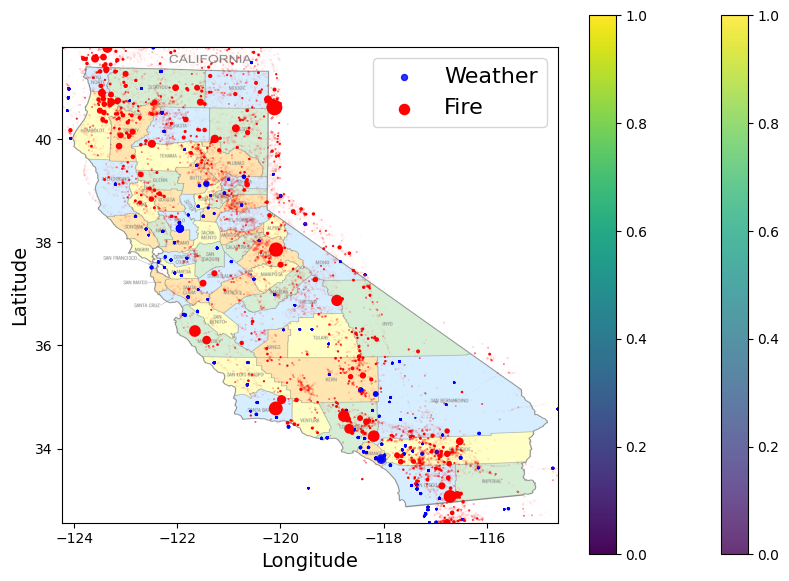

In [132]:
# This is a excellent discussion of the ideas involved in a plot with a colorbar
# https://stackoverflow.com/questions/19816820/how-to-retrieve-colorbar-instance-from-figure-in-matplotlib
# What's called a "scalar mappable" in that discussion might also be called a scalar-valued function,
# a function that assigns a scalar value to each x,y point being plotted. Our scalar mappable in
# this example is NOT the image of CA, but the housing prices assigned tp each point in the scatter plot.

import matplotlib.image as mpimg
import os

california_img = mpimg.imread(os.path.join('california.png'))
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
ax = weather.plot(kind='scatter', x="LocationLng", y="LocationLat", figsize=(10,7), s = weather['Precipitation(in)'] / 1.2,
                       label="Weather", c='blue', alpha=0.8, cmap=plt.get_cmap("jet"),
                       colorbar=True
                      )
wildfires.plot(kind="scatter", x= "LONGITUDE", y= "LATITUDE", s= wildfires['FIRE_SIZE'] / 3000,
                       label="Fire" , c='red' ,ax=ax , alpha=0.99, cmap=plt.get_cmap("jet"),
                       colorbar=True
                      )

plt.imshow(california_img, extent=[-124.238, -114.6189, 32.563, 41.7837], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

In [139]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

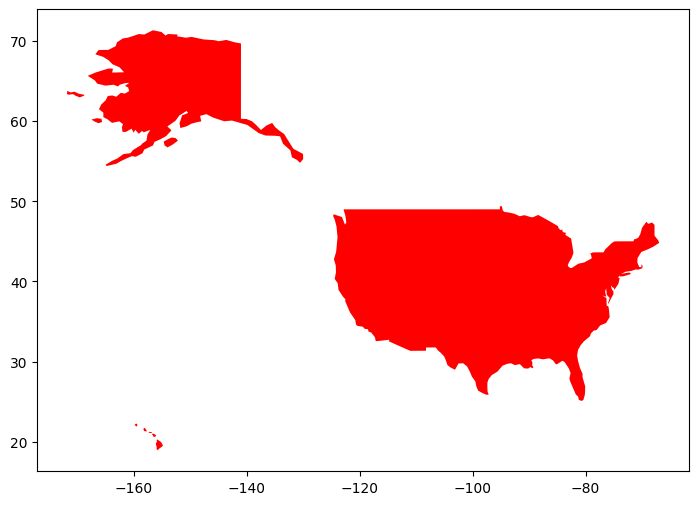

In [179]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#geometry = [Point(xy) for xy in zip(weather['LocationLng'], weather['LocationLat'])]
#gdf = GeoDataFrame(weather, geometry=geometry)   

#this is a simple map that goes with geopandas
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=us.plot(figsize=(10, 6), marker='o', color='red', markersize=15);
#plt.xlim(-122,-110)
#plt.ylim(30,50)


In [171]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world['name'] == "United States of America"]
type(us)
geopandas.geodataframe.GeoDataFrame

geopandas.geodataframe.GeoDataFrame

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


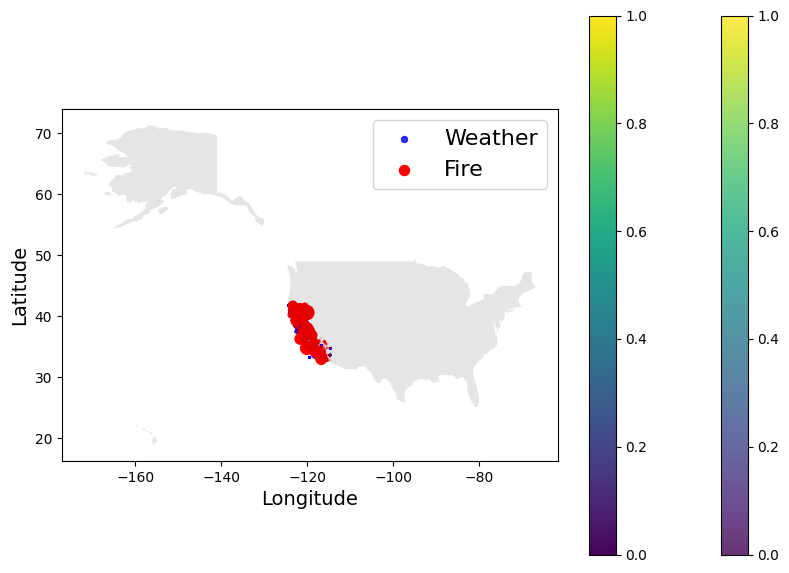

In [181]:
california_img = mpimg.imread(os.path.join('california.png'))
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
ax = weather.plot(kind='scatter', x="LocationLng", y="LocationLat", figsize=(10,7), s = weather['Precipitation(in)'] / 1.2,
                       label="Weather", c='blue', alpha=0.8, cmap=plt.get_cmap("jet"),
                       colorbar=True
                      )
wildfires.plot(kind="scatter", x= "LONGITUDE", y= "LATITUDE", s= wildfires['FIRE_SIZE'] / 3000,
                       label="Fire" , c='red' ,ax=ax , alpha=0.99, cmap=plt.get_cmap("jet"),
                       colorbar=True
                      )
us.plot(figsize=(10, 6), marker='o', color='black', ax=ax, alpha=0.1);
#plt.imshow(california_img, extent=[-124.238, -114.6189, 32.563, 41.7837], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()